In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    ConfusionMatrixDisplay, accuracy_score,
    precision_score, recall_score,
    f1_score, roc_auc_score,confusion_matrix)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
#file path
file_path = "/content/drive/MyDrive/Dataset2Use_Assignment1.xlsx"

try:
    df = pd.read_excel(file_path)
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the path is correct and the file is accessible.")
except Exception as e:
    print(f"An error occurred: {e}")


#Check
if df.isnull().values.any():
    print("Notification: Missing records (NaNs) detected in the dataset.")
    print(df.isnull().sum())
else:
    print("Notification: No missing records (NaNs) found in the dataset.")

   365* ( Β.Υ / Κοστ.Πωλ )  Λειτ.Αποτ/Συν.Ενεργ. (ROA)  \
0              1014.128862                    0.011751   
1               561.974631                    0.099662   
2               826.919025                    0.009594   
3               493.176956                    0.196284   
4               100.421465                    0.179038   

   ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ   ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  \
0                 0.038505                                        0.965479   
1                 0.015775                                        1.415467   
2                 0.093562                                        1.575034   
3                 0.000581                                        1.346780   
4                 0.000173                                        3.299687   

   (ΑΠΑΙΤ.*365) / ΠΩΛ.  Συν.Υποχρ/Συν.Ενεργ  Διάρκεια Παραμονής Αποθεμάτων  \
0           567.866550             0.532258                     545.195964   
1           335.917481    

In [ ]:
#normalization
indicator_columns = df.columns[0:8]

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[indicator_columns] = scaler.fit_transform(df_scaled[indicator_columns])

print("Data successfully normalized. Displaying the first 5 rows of the scaled data:")
print(df_scaled[indicator_columns].head())

Data successfully normalized. Displaying the first 5 rows of the scaled data:
   365* ( Β.Υ / Κοστ.Πωλ )  Λειτ.Αποτ/Συν.Ενεργ. (ROA)  \
0                 0.675945                    0.556137   
1                 0.374377                    0.636057   
2                 0.551084                    0.554176   
3                 0.328492                    0.723895   
4                 0.066540                    0.708216   

   ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ   ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  \
0                 0.192526                                        0.192989   
1                 0.078877                                        0.282999   
2                 0.467810                                        0.314916   
3                 0.002904                                        0.269259   
4                 0.000866                                        0.659892   

   (ΑΠΑΙΤ.*365) / ΠΩΛ.  Συν.Υποχρ/Συν.Ενεργ  Διάρκεια Παραμονής Αποθεμάτων  \
0             0.473222    

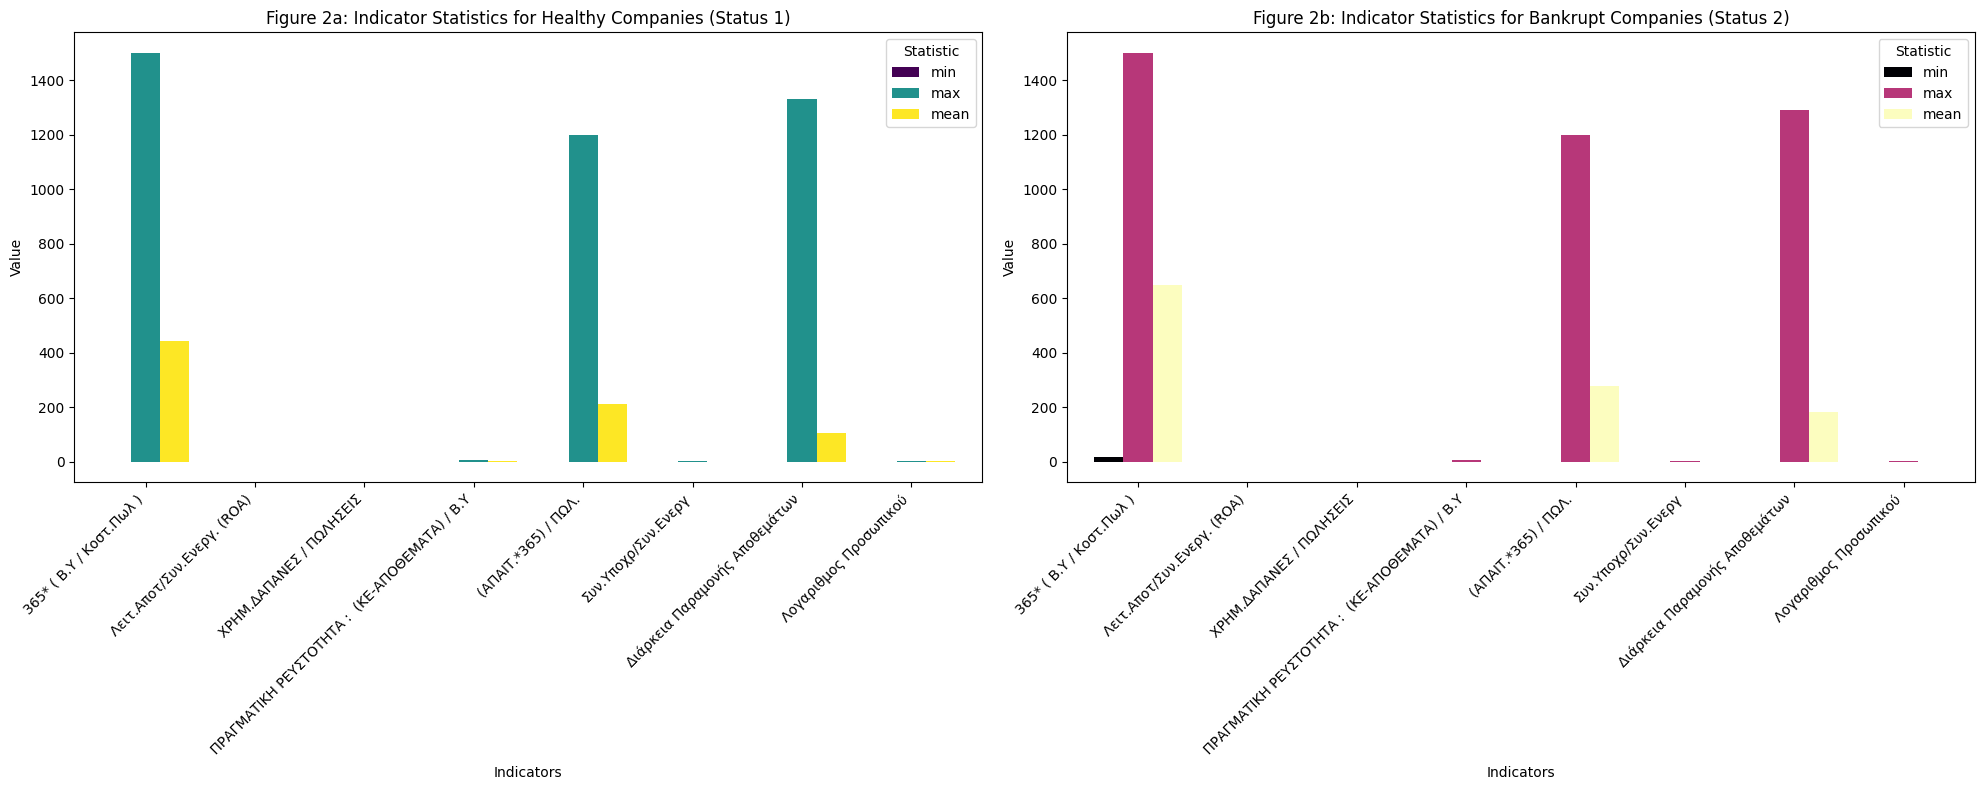

In [ ]:
#Statistics
healthy_companies = df[df['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 1]
bankrupt_companies = df[df['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 2]

healthy_stats = healthy_companies[indicator_columns].agg(['min', 'max', 'mean']).transpose()
bankrupt_stats = bankrupt_companies[indicator_columns].agg(['min', 'max', 'mean']).transpose()

#Figure 2
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=False)

#For Healthy Companies
healthy_stats.plot(kind='bar', ax=axes[0], colormap='viridis', width=0.8)
axes[0].set_title('Figure 2a: Indicator Statistics for Healthy Companies (Status 1)')
axes[0].set_xlabel('Indicators')
axes[0].set_ylabel('Value')
axes[0].tick_params(axis='x', rotation=45)
plt.setp(axes[0].get_xticklabels(), ha='right')
axes[0].legend(title='Statistic')

#For Bankrupt Companies
bankrupt_stats.plot(kind='bar', ax=axes[1], colormap='magma', width=0.8)
axes[1].set_title('Figure 2b: Indicator Statistics for Bankrupt Companies (Status 2)')
axes[1].set_xlabel('Indicators')
axes[1].set_ylabel('Value')
axes[1].tick_params(axis='x', rotation=45)
plt.setp(axes[1].get_xticklabels(), ha='right')
axes[1].legend(title='Statistic')

plt.tight_layout()
plt.show()

In [ ]:
#Statistics to show the diference between max and min on each indicator
print("Statistics for Healthy Companies:")
display(healthy_stats)

print("\nStatistics for Bankrupt Companies:")
display(bankrupt_stats)

Statistics for Healthy Companies:


,min,max,mean
365* ( Β.Υ / Κοστ.Πωλ ),0.654350,1500.000000,441.648877
Λειτ.Αποτ/Συν.Ενεργ. (ROA),-0.600000,0.500000,0.039294
ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ,0.000000,0.200000,0.028148
ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ : (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ,0.000661,5.000000,1.149169
(ΑΠΑΙΤ.*365) / ΠΩΛ.,0.000000,1200.000000,211.906358
Συν.Υποχρ/Συν.Ενεργ,0.000412,1.670000,0.741319
Διάρκεια Παραμονής Αποθεμάτων,0.000000,1332.105492,107.062963
Λογαριθμος Προσωπικού,0.000000,2.929930,1.031274



Statistics for Bankrupt Companies:


,min,max,mean
365* ( Β.Υ / Κοστ.Πωλ ),17.374899,1500.000000,646.921590
Λειτ.Αποτ/Συν.Ενεργ. (ROA),-0.600000,0.470065,-0.038892
ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ,0.000000,0.200000,0.061917
ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ : (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ,0.008819,5.000000,0.850250
(ΑΠΑΙΤ.*365) / ΠΩΛ.,0.000000,1200.000000,278.521196
Συν.Υποχρ/Συν.Ενεργ,0.049999,1.670000,0.860418
Διάρκεια Παραμονής Αποθεμάτων,0.000000,1290.425440,183.978567
Λογαριθμος Προσωπικού,0.000000,1.880814,0.585120


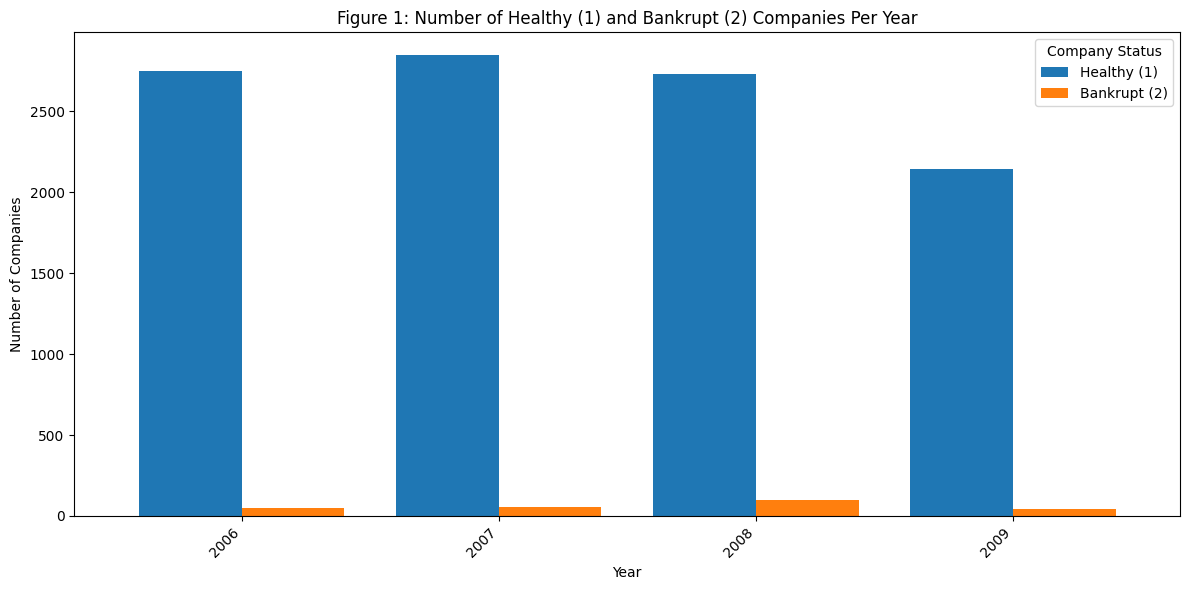

In [ ]:
#Rename columns
df_renamed = df.rename(columns={'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)': 'Status', 'ΕΤΟΣ': 'Year'})

company_status_by_year = df_renamed.groupby(['Year', 'Status']).size().unstack(fill_value=0)

#Figure 1
fig, ax = plt.subplots(figsize=(12, 6))
company_status_by_year.plot(kind='bar', stacked=False, ax=ax, width=0.8)

ax.set_title('Figure 1: Number of Healthy (1) and Bankrupt (2) Companies Per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Companies')
ax.legend(['Healthy (1)', 'Bankrupt (2)'], title='Company Status')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
target_column_name = 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'

y = df_scaled[target_column_name].map({1: 0, 2: 1}).astype(int)
X = df_scaled.drop(columns=[target_column_name, 'ΕΤΟΣ'])

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)
print("First 5 rows of X:")
print(X.head())
print("First 5 values of y:")
print(y.head())

Shape of features (X): (10716, 11)
Shape of target (y): (10716,)
First 5 rows of X:
   365* ( Β.Υ / Κοστ.Πωλ )  Λειτ.Αποτ/Συν.Ενεργ. (ROA)  \
0                 0.675945                    0.556137   
1                 0.374377                    0.636057   
2                 0.551084                    0.554176   
3                 0.328492                    0.723895   
4                 0.066540                    0.708216   

   ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ   ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  \
0                 0.192526                                        0.192989   
1                 0.078877                                        0.282999   
2                 0.467810                                        0.314916   
3                 0.002904                                        0.269259   
4                 0.000866                                        0.659892   

   (ΑΠΑΙΤ.*365) / ΠΩΛ.  Συν.Υποχρ/Συν.Ενεργ  Διάρκεια Παραμονής Αποθεμάτων  \
0             0.4732


Processing Fold 1/4...
Train distribution (Original):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
0    7851
1     186
Name: count, dtype: int64
Test distribution (Original):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
0    2617
1      62
Name: count, dtype: int64
  Train set for Fold 1 was unbalanced (Healthy:7851, Bankrupt:186).
  Downsampling healthy companies to achieve a 3:1 ratio. New healthy count: 558
  Balanced X_train shape: (744, 11), y_train shape: (744,)

--- Fold 1 FINAL Distributions (Requirement 7) ---
Balanced Training set distribution:
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
0    558
1    186
Name: count, dtype: int64
Test set distribution (Original):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
0    2617
1      62
Name: count, dtype: int64

--- Training LDA for Fold 1 ---
  Training Metrics:
    Accuracy: 0.79
    Precision: 0.63
    Recall: 0.34
    F1-score: 0.45
    AUC ROC: 0.83


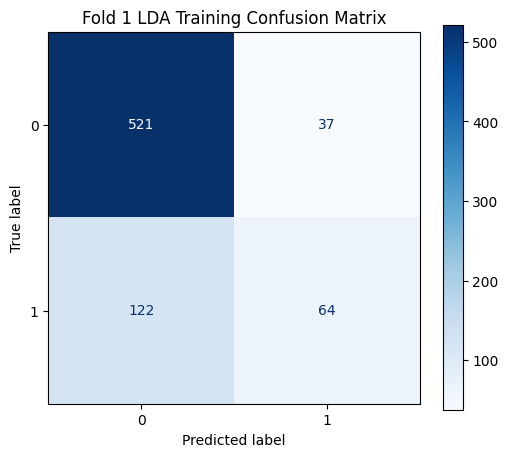

/tmp/ipython-input-2463043465.py:138: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  current_results_df = pd.concat([current_results_df, new_row], ignore_index=True)


  Test Metrics:
    Accuracy: 0.93
    Precision: 0.13
    Recall: 0.35
    F1-score: 0.19
    AUC ROC: 0.82


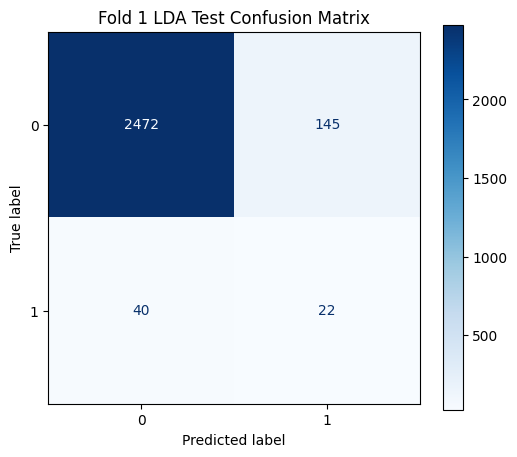


--- Training Logistic Regression for Fold 1 ---
  Training Metrics:
    Accuracy: 0.78
    Precision: 0.61
    Recall: 0.29
    F1-score: 0.39
    AUC ROC: 0.83


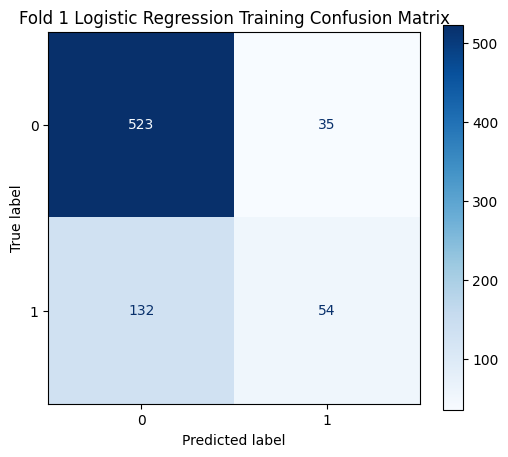

  Test Metrics:
    Accuracy: 0.94
    Precision: 0.14
    Recall: 0.31
    F1-score: 0.19
    AUC ROC: 0.83


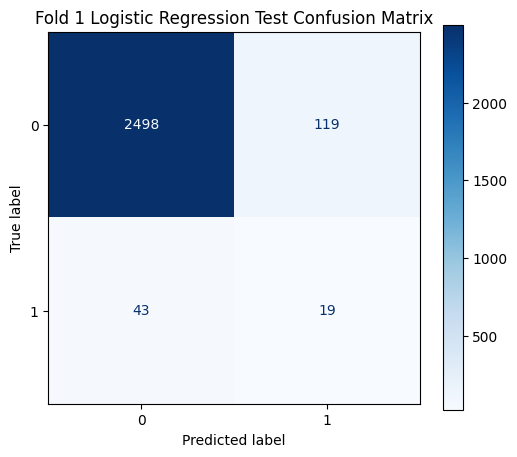


--- Training Decision Tree for Fold 1 ---
  Training Metrics:
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1-score: 1.00
    AUC ROC: 1.00


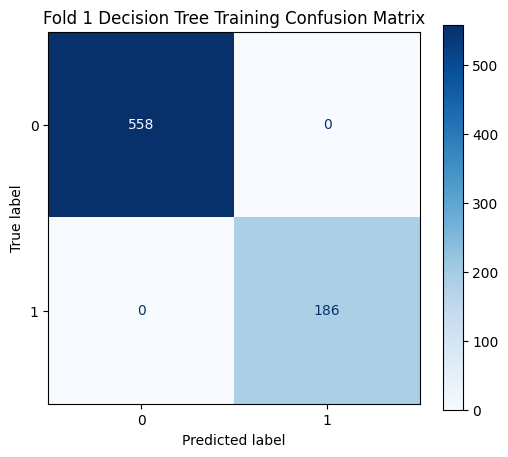

  Test Metrics:
    Accuracy: 0.80
    Precision: 0.06
    Recall: 0.50
    F1-score: 0.11
    AUC ROC: 0.66


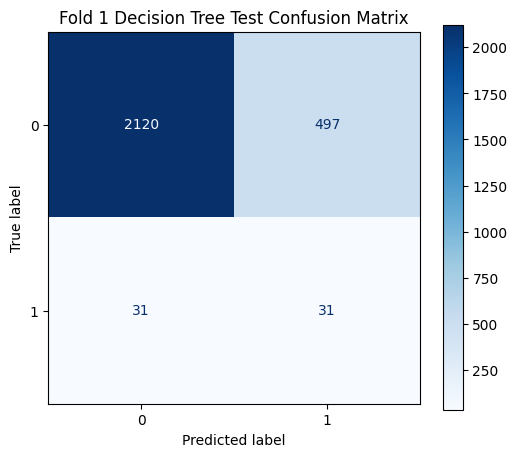


--- Training Random Forest for Fold 1 ---
  Training Metrics:
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1-score: 1.00
    AUC ROC: 1.00


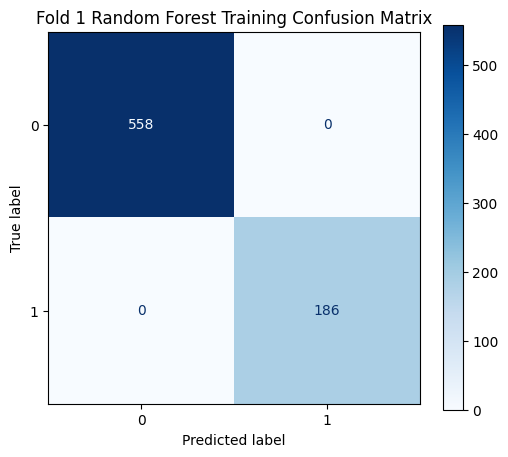

  Test Metrics:
    Accuracy: 0.92
    Precision: 0.14
    Recall: 0.48
    F1-score: 0.22
    AUC ROC: 0.84


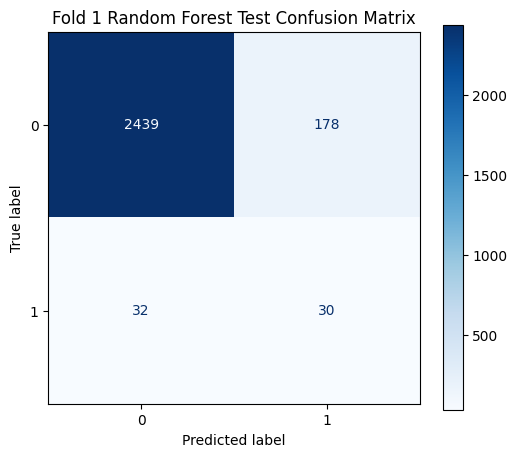


--- Training K-NN for Fold 1 ---
  Training Metrics:
    Accuracy: 0.85
    Precision: 0.75
    Recall: 0.61
    F1-score: 0.67
    AUC ROC: 0.92


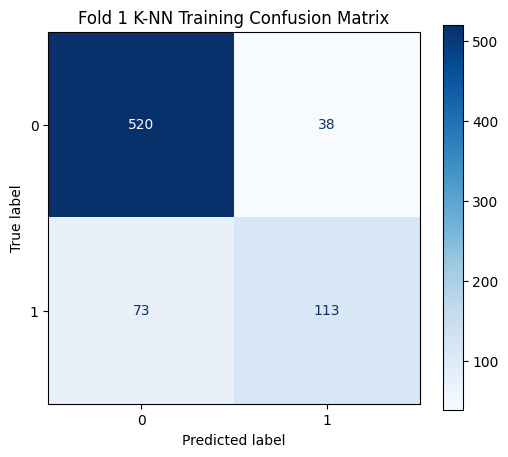

  Test Metrics:
    Accuracy: 0.88
    Precision: 0.10
    Recall: 0.52
    F1-score: 0.17
    AUC ROC: 0.82


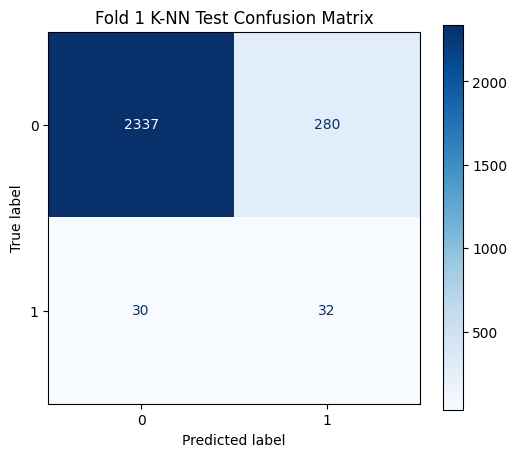


--- Training Naïve Bayes for Fold 1 ---
  Training Metrics:
    Accuracy: 0.77
    Precision: 0.55
    Recall: 0.42
    F1-score: 0.48
    AUC ROC: 0.81


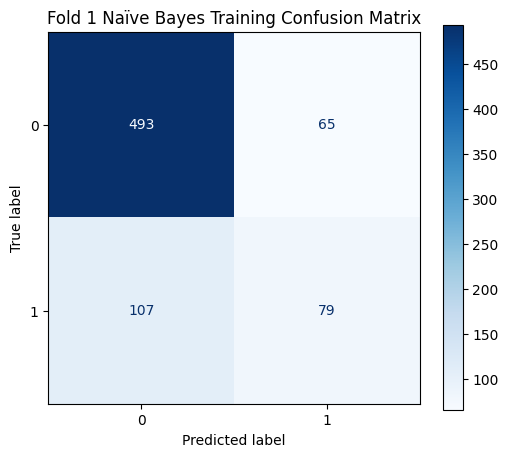

  Test Metrics:
    Accuracy: 0.89
    Precision: 0.10
    Recall: 0.47
    F1-score: 0.16
    AUC ROC: 0.82


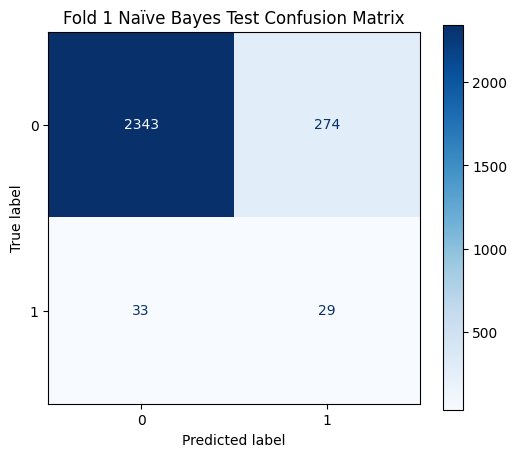


--- Training SVM for Fold 1 ---
  Training Metrics:
    Accuracy: 0.81
    Precision: 0.79
    Recall: 0.34
    F1-score: 0.47
    AUC ROC: 0.88


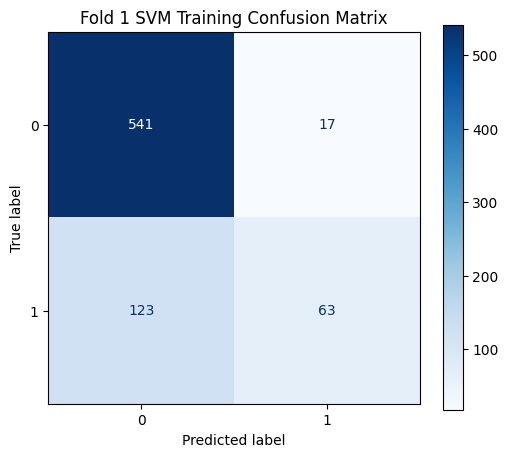

  Test Metrics:
    Accuracy: 0.95
    Precision: 0.19
    Recall: 0.32
    F1-score: 0.24
    AUC ROC: 0.85


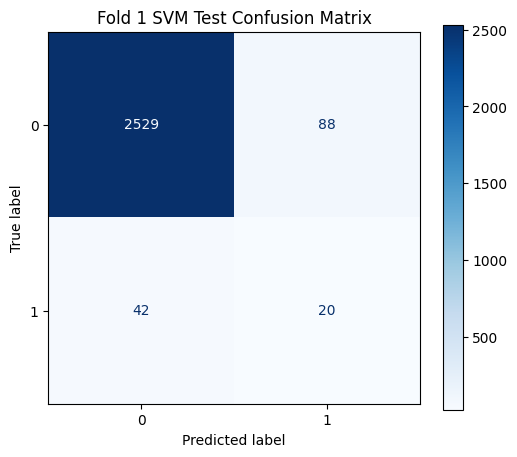


--- Training XGBoost for Fold 1 ---
  Training Metrics:
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1-score: 1.00
    AUC ROC: 1.00


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [00:38:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


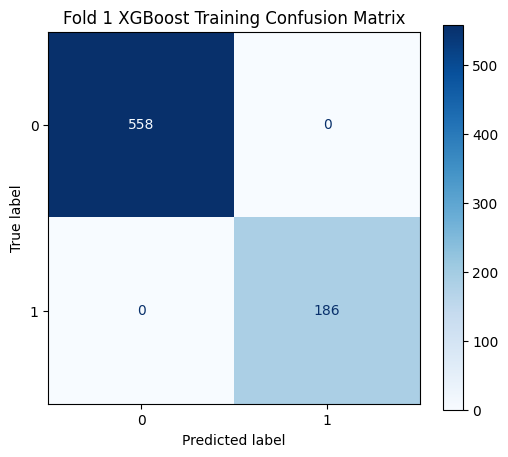

  Test Metrics:
    Accuracy: 0.90
    Precision: 0.10
    Recall: 0.44
    F1-score: 0.16
    AUC ROC: 0.81


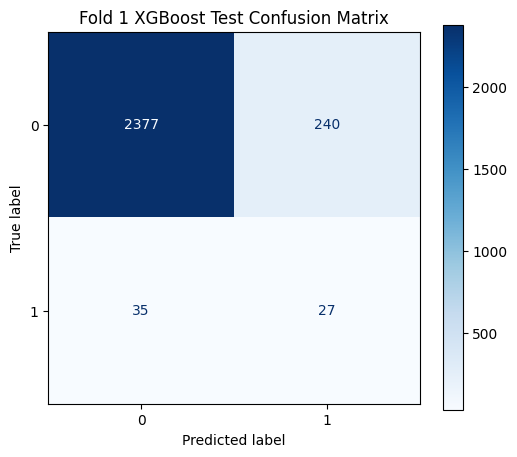


Processing Fold 2/4...
Train distribution (Original):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
0    7851
1     186
Name: count, dtype: int64
Test distribution (Original):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
0    2617
1      62
Name: count, dtype: int64
  Train set for Fold 2 was unbalanced (Healthy:7851, Bankrupt:186).
  Downsampling healthy companies to achieve a 3:1 ratio. New healthy count: 558
  Balanced X_train shape: (744, 11), y_train shape: (744,)

--- Fold 2 FINAL Distributions (Requirement 7) ---
Balanced Training set distribution:
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
0    558
1    186
Name: count, dtype: int64
Test set distribution (Original):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
0    2617
1      62
Name: count, dtype: int64

--- Training LDA for Fold 2 ---
  Training Metrics:
    Accuracy: 0.78
    Precision: 0.60
    Recall: 0.39
    F1-score: 0.47
    AUC ROC: 0.82


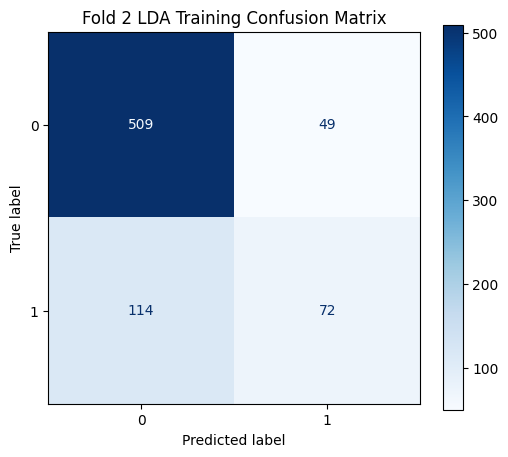

  Test Metrics:
    Accuracy: 0.93
    Precision: 0.16
    Recall: 0.52
    F1-score: 0.25
    AUC ROC: 0.87


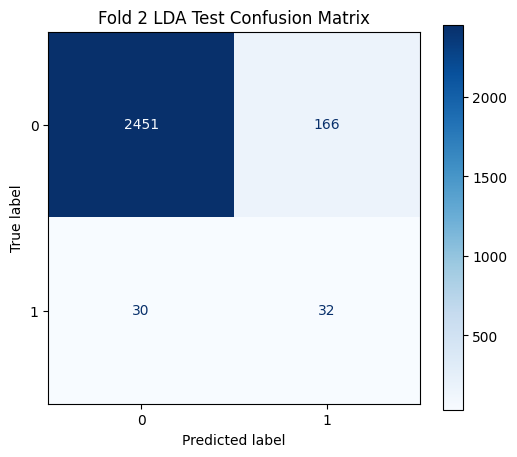


--- Training Logistic Regression for Fold 2 ---
  Training Metrics:
    Accuracy: 0.79
    Precision: 0.65
    Recall: 0.34
    F1-score: 0.45
    AUC ROC: 0.82


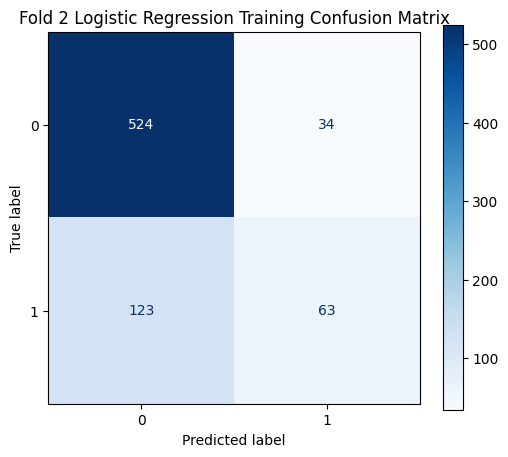

  Test Metrics:
    Accuracy: 0.94
    Precision: 0.15
    Recall: 0.39
    F1-score: 0.22
    AUC ROC: 0.86


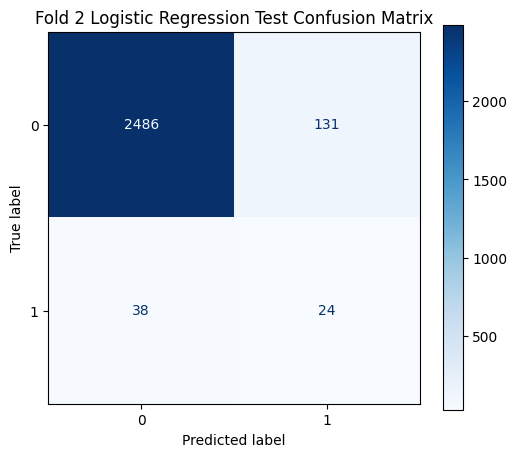


--- Training Decision Tree for Fold 2 ---
  Training Metrics:
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1-score: 1.00
    AUC ROC: 1.00


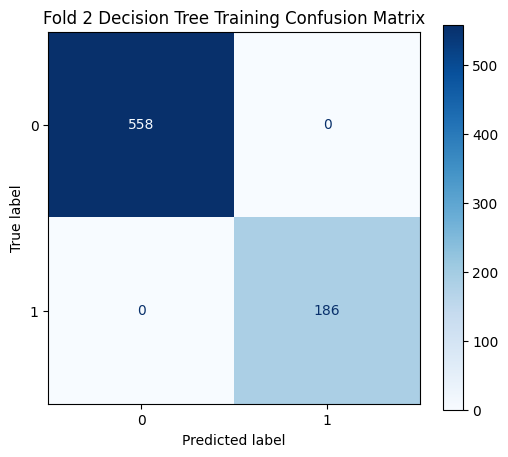

  Test Metrics:
    Accuracy: 0.82
    Precision: 0.08
    Recall: 0.61
    F1-score: 0.13
    AUC ROC: 0.72


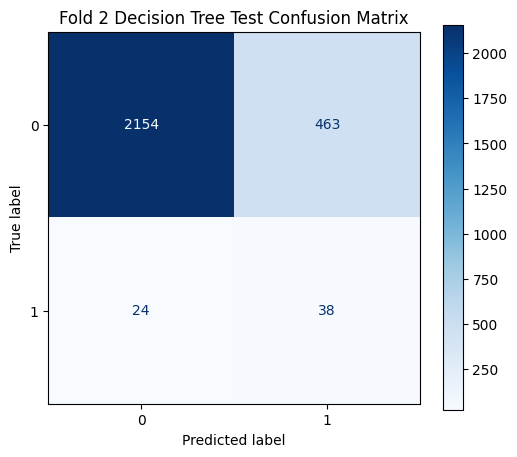


--- Training Random Forest for Fold 2 ---
  Training Metrics:
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1-score: 1.00
    AUC ROC: 1.00


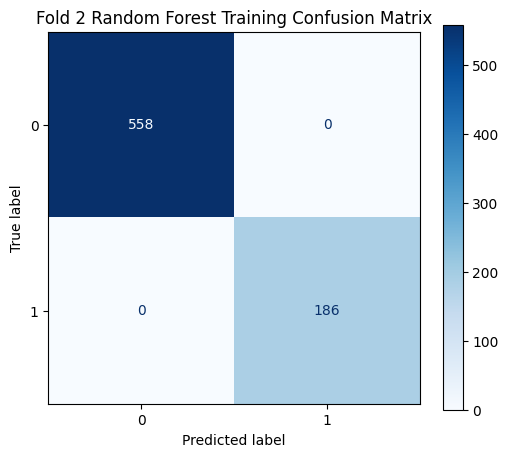

  Test Metrics:
    Accuracy: 0.92
    Precision: 0.16
    Recall: 0.56
    F1-score: 0.25
    AUC ROC: 0.89


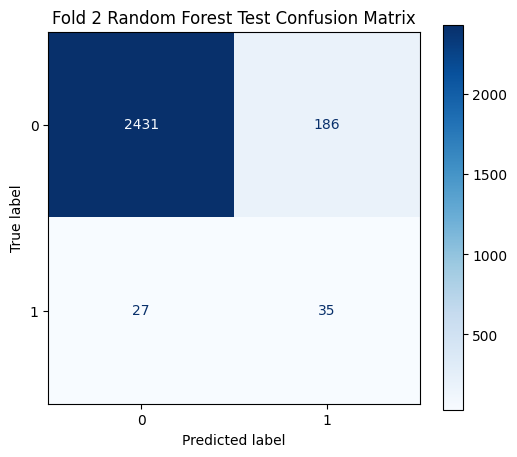


--- Training K-NN for Fold 2 ---
  Training Metrics:
    Accuracy: 0.85
    Precision: 0.76
    Recall: 0.56
    F1-score: 0.65
    AUC ROC: 0.91


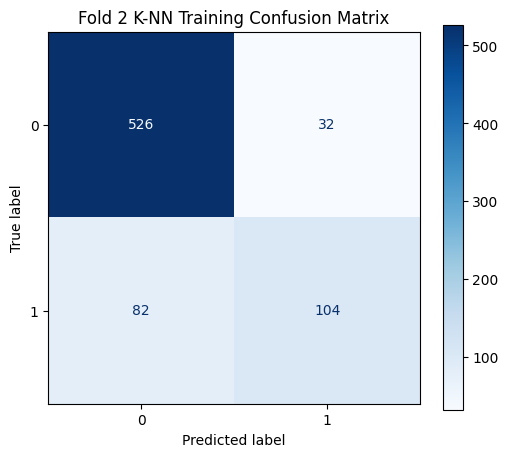

  Test Metrics:
    Accuracy: 0.89
    Precision: 0.11
    Recall: 0.52
    F1-score: 0.18
    AUC ROC: 0.84


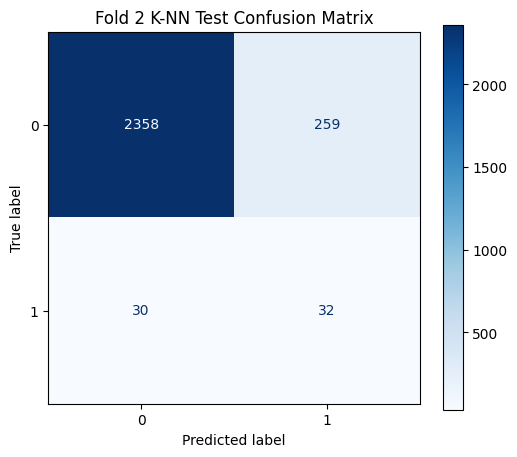


--- Training Naïve Bayes for Fold 2 ---
  Training Metrics:
    Accuracy: 0.77
    Precision: 0.54
    Recall: 0.52
    F1-score: 0.53
    AUC ROC: 0.80


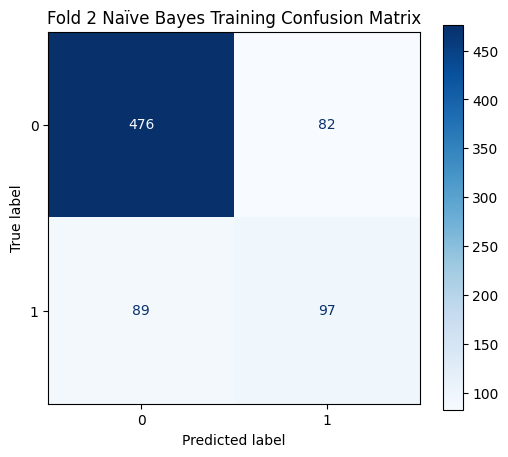

  Test Metrics:
    Accuracy: 0.86
    Precision: 0.11
    Recall: 0.69
    F1-score: 0.19
    AUC ROC: 0.84


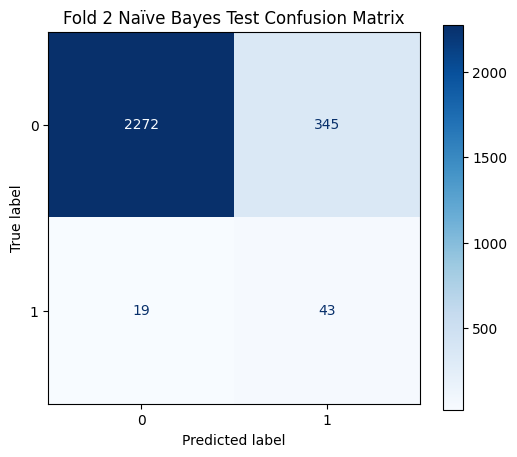


--- Training SVM for Fold 2 ---
  Training Metrics:
    Accuracy: 0.82
    Precision: 0.84
    Recall: 0.36
    F1-score: 0.50
    AUC ROC: 0.88


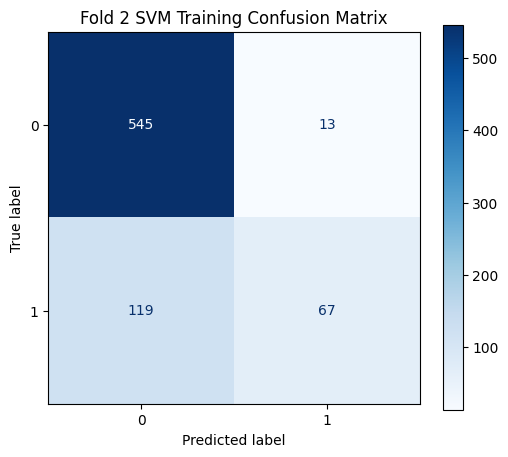

  Test Metrics:
    Accuracy: 0.95
    Precision: 0.17
    Recall: 0.32
    F1-score: 0.22
    AUC ROC: 0.86


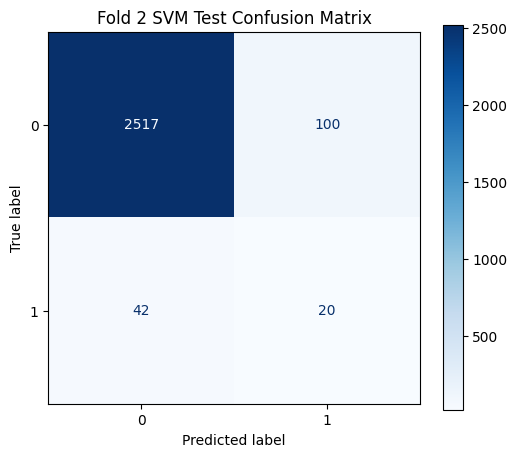


--- Training XGBoost for Fold 2 ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [00:38:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Training Metrics:
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1-score: 1.00
    AUC ROC: 1.00


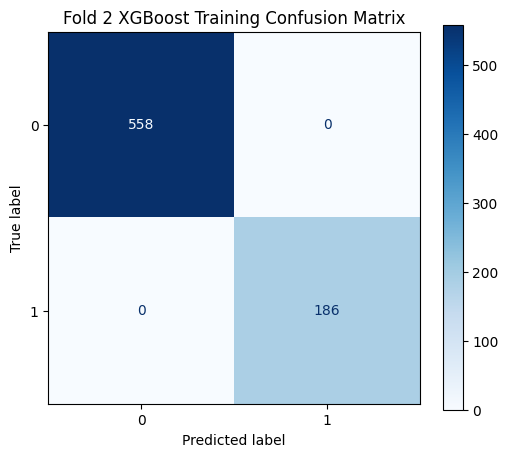

  Test Metrics:
    Accuracy: 0.88
    Precision: 0.11
    Recall: 0.60
    F1-score: 0.19
    AUC ROC: 0.87


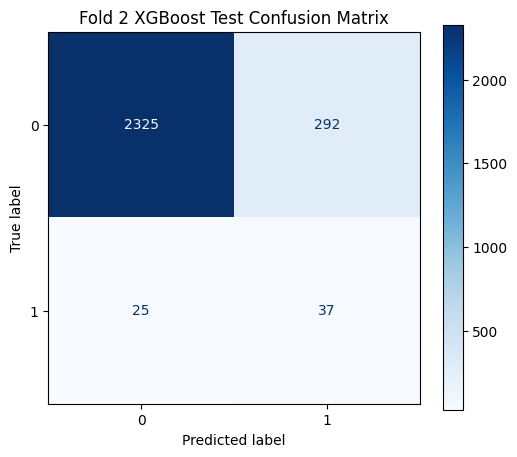


Processing Fold 3/4...
Train distribution (Original):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
0    7851
1     186
Name: count, dtype: int64
Test distribution (Original):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
0    2617
1      62
Name: count, dtype: int64
  Train set for Fold 3 was unbalanced (Healthy:7851, Bankrupt:186).
  Downsampling healthy companies to achieve a 3:1 ratio. New healthy count: 558
  Balanced X_train shape: (744, 11), y_train shape: (744,)

--- Fold 3 FINAL Distributions (Requirement 7) ---
Balanced Training set distribution:
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
0    558
1    186
Name: count, dtype: int64
Test set distribution (Original):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
0    2617
1      62
Name: count, dtype: int64

--- Training LDA for Fold 3 ---
  Training Metrics:
    Accuracy: 0.81
    Precision: 0.70
    Recall: 0.45
    F1-score: 0.54
    AUC ROC: 0.85


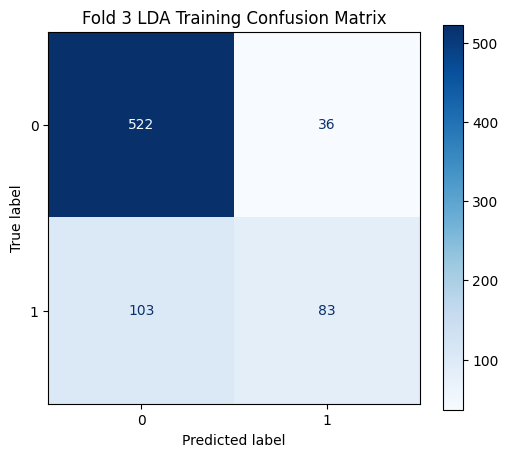

  Test Metrics:
    Accuracy: 0.91
    Precision: 0.09
    Recall: 0.32
    F1-score: 0.14
    AUC ROC: 0.80


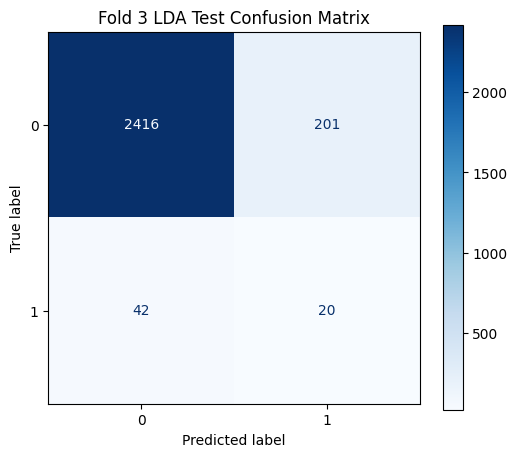


--- Training Logistic Regression for Fold 3 ---
  Training Metrics:
    Accuracy: 0.81
    Precision: 0.72
    Recall: 0.38
    F1-score: 0.50
    AUC ROC: 0.85


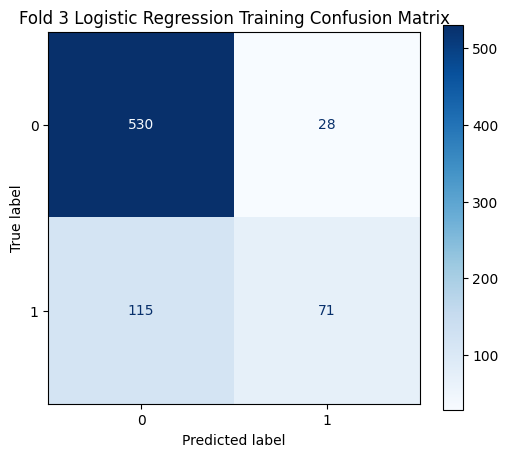

  Test Metrics:
    Accuracy: 0.92
    Precision: 0.08
    Recall: 0.26
    F1-score: 0.13
    AUC ROC: 0.79


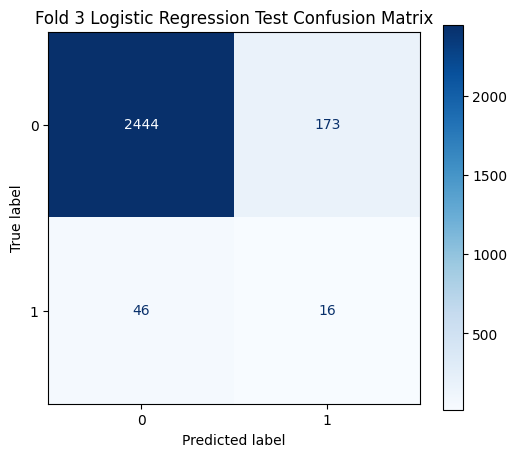


--- Training Decision Tree for Fold 3 ---
  Training Metrics:
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1-score: 1.00
    AUC ROC: 1.00


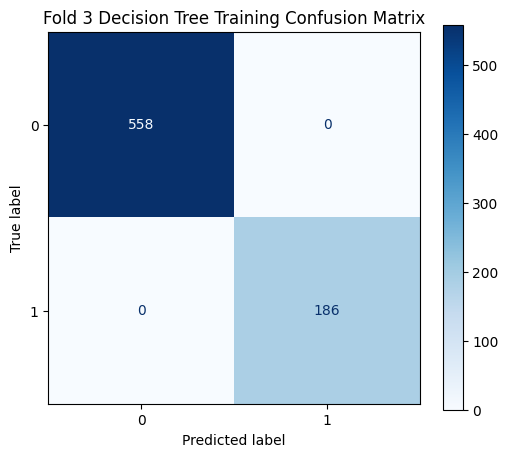

  Test Metrics:
    Accuracy: 0.82
    Precision: 0.06
    Recall: 0.44
    F1-score: 0.10
    AUC ROC: 0.63


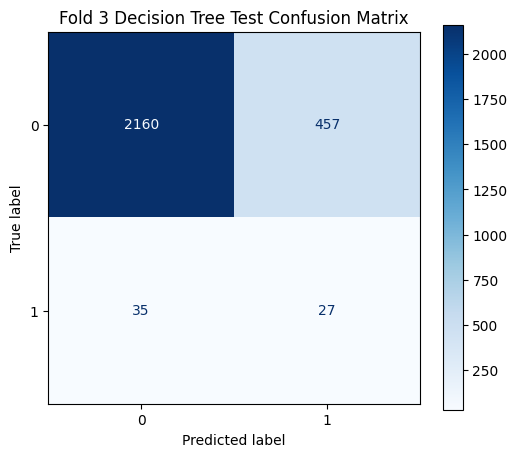


--- Training Random Forest for Fold 3 ---
  Training Metrics:
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1-score: 1.00
    AUC ROC: 1.00


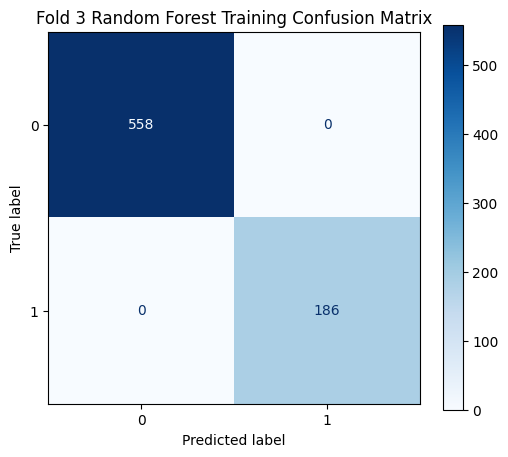

  Test Metrics:
    Accuracy: 0.91
    Precision: 0.09
    Recall: 0.34
    F1-score: 0.15
    AUC ROC: 0.78


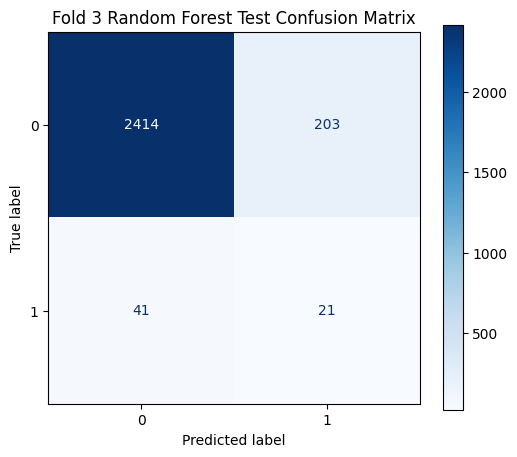


--- Training K-NN for Fold 3 ---
  Training Metrics:
    Accuracy: 0.86
    Precision: 0.76
    Recall: 0.62
    F1-score: 0.68
    AUC ROC: 0.92


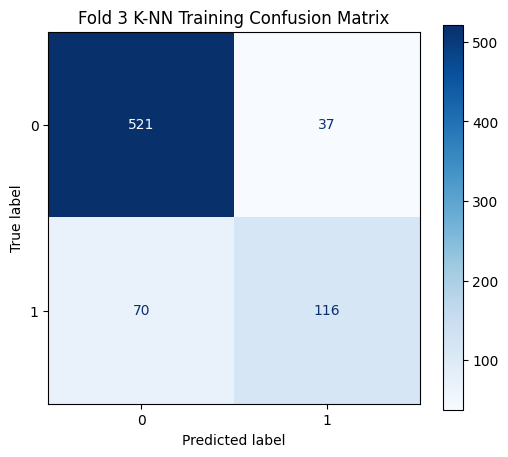

  Test Metrics:
    Accuracy: 0.89
    Precision: 0.07
    Recall: 0.32
    F1-score: 0.12
    AUC ROC: 0.70


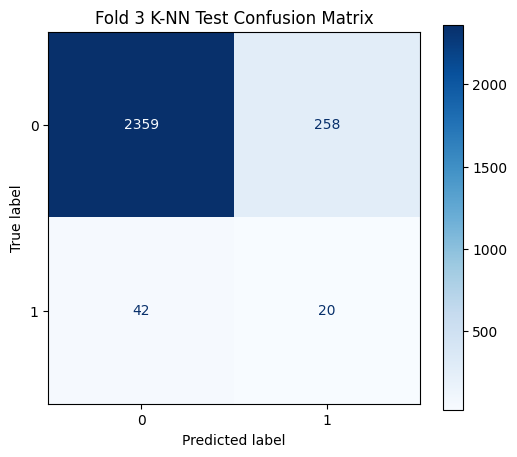


--- Training Naïve Bayes for Fold 3 ---
  Training Metrics:
    Accuracy: 0.81
    Precision: 0.63
    Recall: 0.55
    F1-score: 0.59
    AUC ROC: 0.84


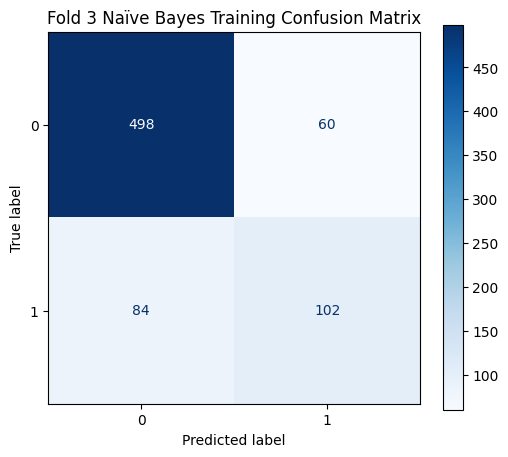

  Test Metrics:
    Accuracy: 0.86
    Precision: 0.07
    Recall: 0.39
    F1-score: 0.11
    AUC ROC: 0.77


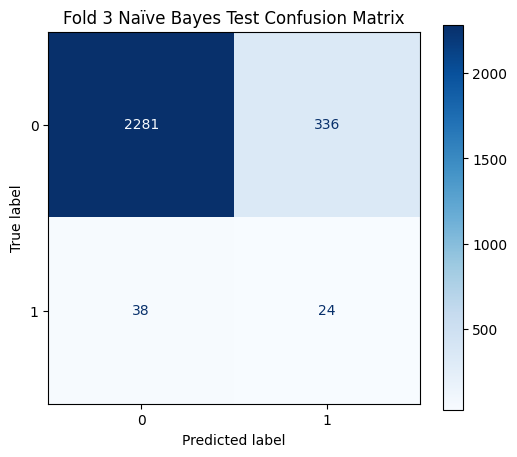


--- Training SVM for Fold 3 ---
  Training Metrics:
    Accuracy: 0.83
    Precision: 0.79
    Recall: 0.45
    F1-score: 0.58
    AUC ROC: 0.89


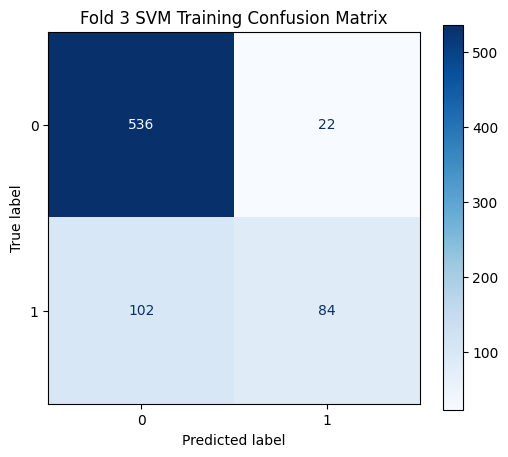

  Test Metrics:
    Accuracy: 0.93
    Precision: 0.10
    Recall: 0.26
    F1-score: 0.14
    AUC ROC: 0.78


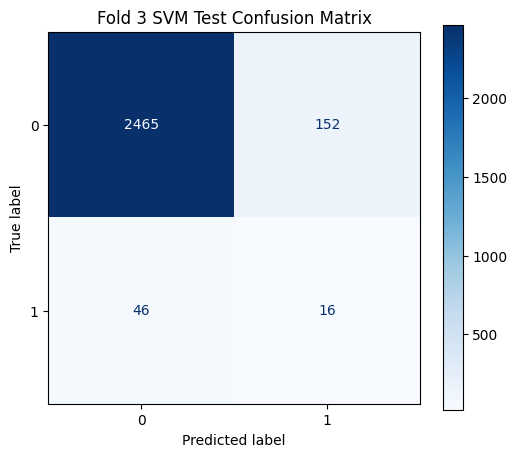


--- Training XGBoost for Fold 3 ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [00:38:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Training Metrics:
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1-score: 1.00
    AUC ROC: 1.00


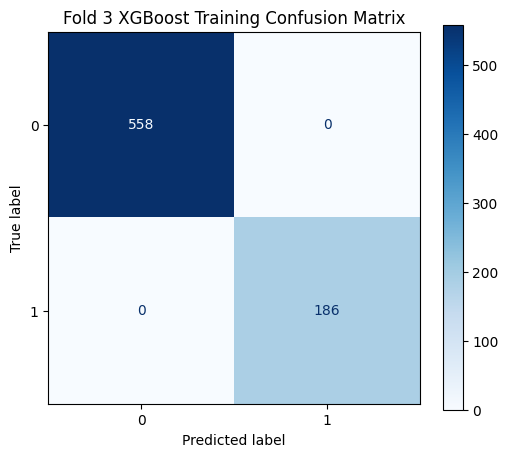

  Test Metrics:
    Accuracy: 0.88
    Precision: 0.08
    Recall: 0.40
    F1-score: 0.14
    AUC ROC: 0.79


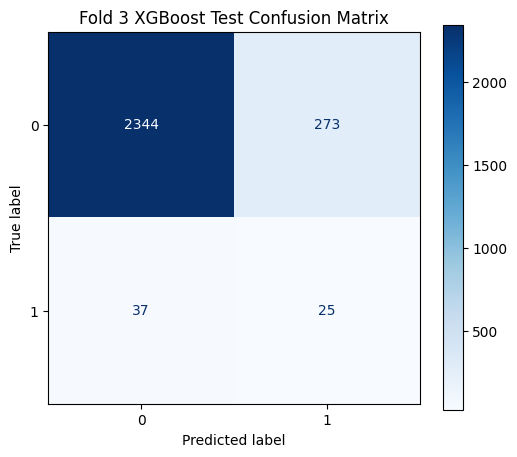


Processing Fold 4/4...
Train distribution (Original):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
0    7851
1     186
Name: count, dtype: int64
Test distribution (Original):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
0    2617
1      62
Name: count, dtype: int64
  Train set for Fold 4 was unbalanced (Healthy:7851, Bankrupt:186).
  Downsampling healthy companies to achieve a 3:1 ratio. New healthy count: 558
  Balanced X_train shape: (744, 11), y_train shape: (744,)

--- Fold 4 FINAL Distributions (Requirement 7) ---
Balanced Training set distribution:
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
0    558
1    186
Name: count, dtype: int64
Test set distribution (Original):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
0    2617
1      62
Name: count, dtype: int64

--- Training LDA for Fold 4 ---
  Training Metrics:
    Accuracy: 0.81
    Precision: 0.69
    Recall: 0.45
    F1-score: 0.54
    AUC ROC: 0.86


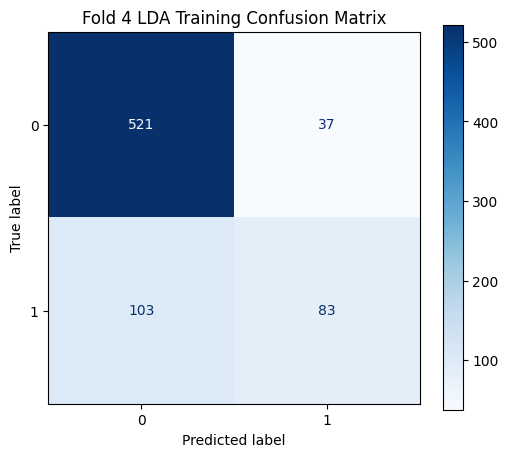

  Test Metrics:
    Accuracy: 0.90
    Precision: 0.10
    Recall: 0.37
    F1-score: 0.15
    AUC ROC: 0.85


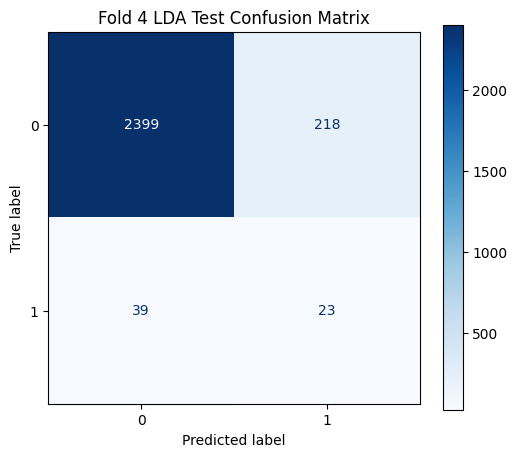


--- Training Logistic Regression for Fold 4 ---
  Training Metrics:
    Accuracy: 0.81
    Precision: 0.71
    Recall: 0.43
    F1-score: 0.54
    AUC ROC: 0.86


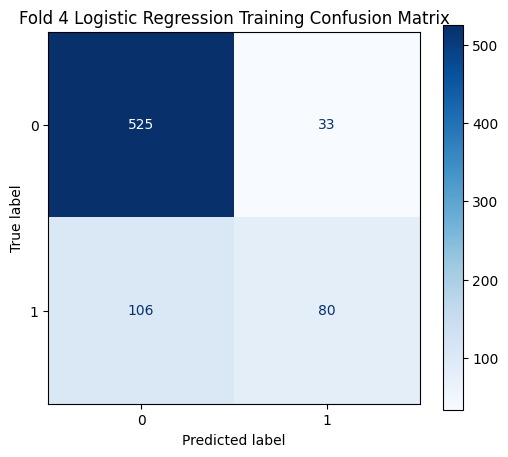

  Test Metrics:
    Accuracy: 0.91
    Precision: 0.10
    Recall: 0.35
    F1-score: 0.16
    AUC ROC: 0.85


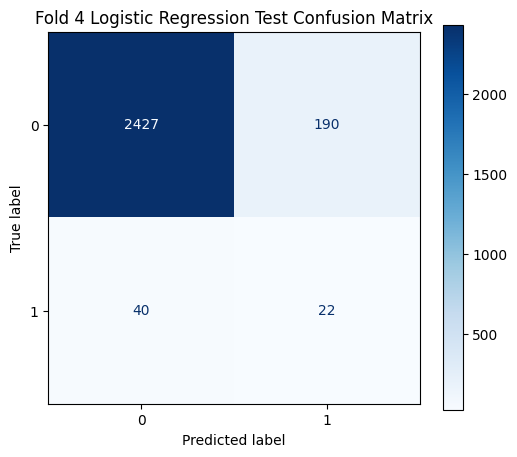


--- Training Decision Tree for Fold 4 ---
  Training Metrics:
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1-score: 1.00
    AUC ROC: 1.00


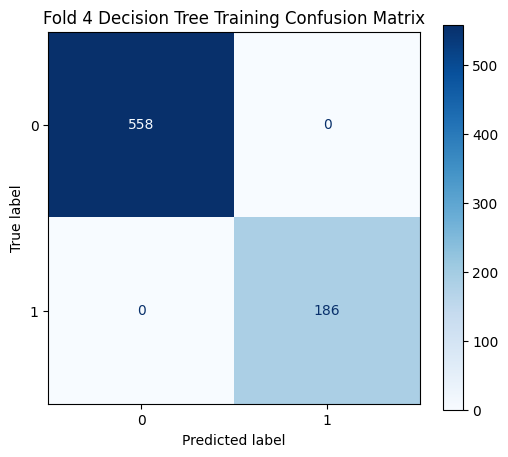

  Test Metrics:
    Accuracy: 0.83
    Precision: 0.07
    Recall: 0.52
    F1-score: 0.12
    AUC ROC: 0.67


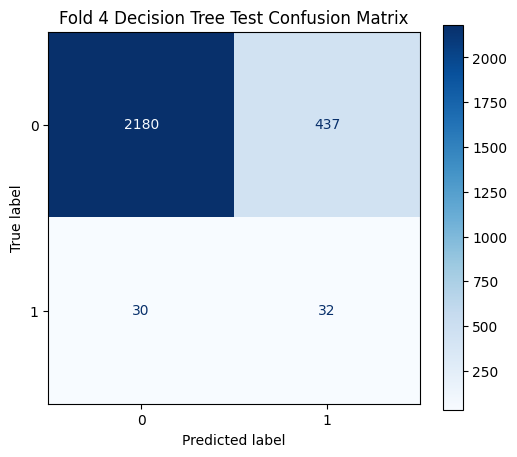


--- Training Random Forest for Fold 4 ---
  Training Metrics:
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1-score: 1.00
    AUC ROC: 1.00


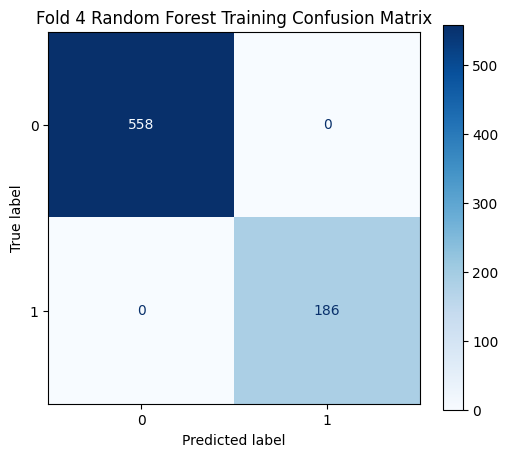

  Test Metrics:
    Accuracy: 0.91
    Precision: 0.11
    Recall: 0.44
    F1-score: 0.18
    AUC ROC: 0.85


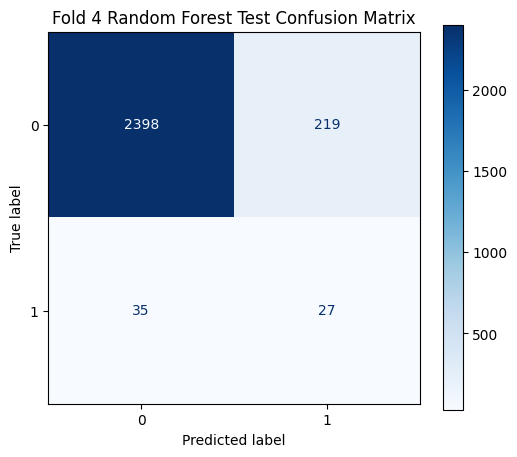


--- Training K-NN for Fold 4 ---
  Training Metrics:
    Accuracy: 0.86
    Precision: 0.78
    Recall: 0.63
    F1-score: 0.70
    AUC ROC: 0.92


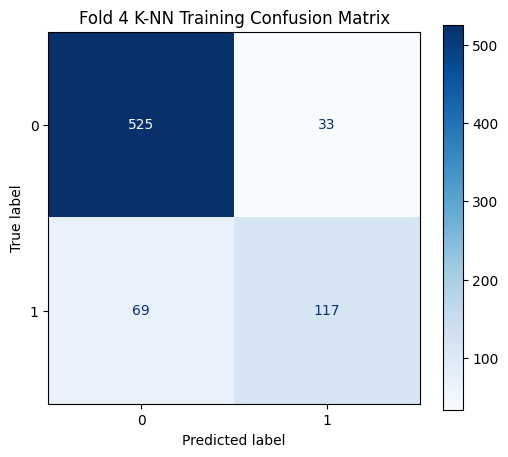

  Test Metrics:
    Accuracy: 0.89
    Precision: 0.11
    Recall: 0.55
    F1-score: 0.18
    AUC ROC: 0.83


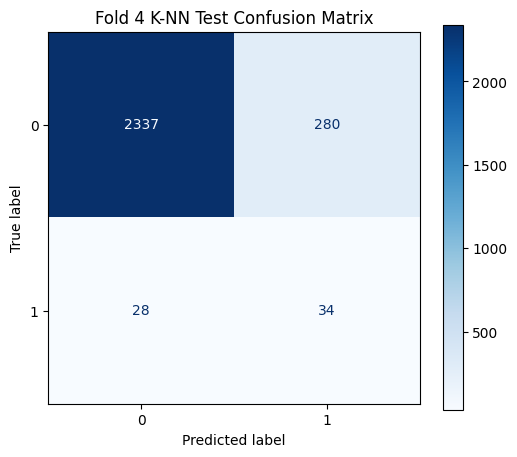


--- Training Naïve Bayes for Fold 4 ---
  Training Metrics:
    Accuracy: 0.79
    Precision: 0.60
    Recall: 0.49
    F1-score: 0.54
    AUC ROC: 0.83


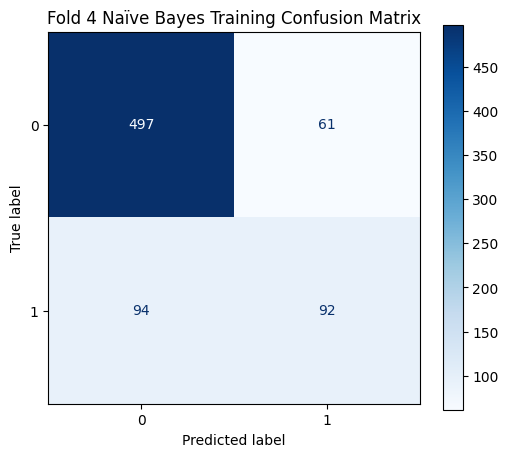

  Test Metrics:
    Accuracy: 0.87
    Precision: 0.08
    Recall: 0.47
    F1-score: 0.14
    AUC ROC: 0.84


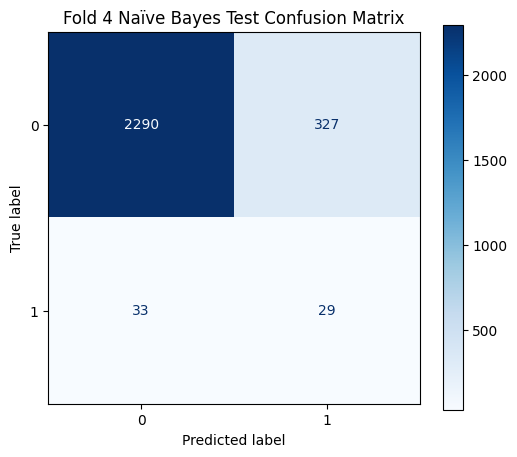


--- Training SVM for Fold 4 ---
  Training Metrics:
    Accuracy: 0.85
    Precision: 0.86
    Recall: 0.49
    F1-score: 0.62
    AUC ROC: 0.89


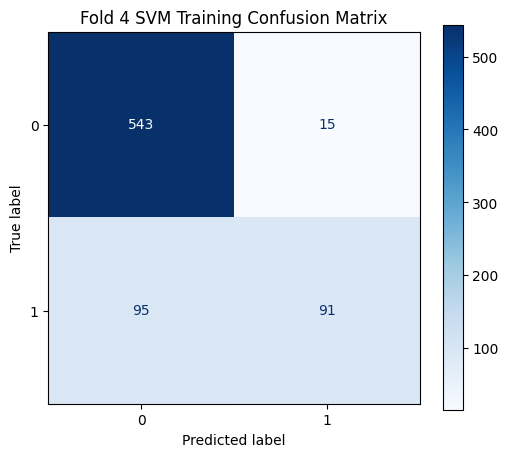

  Test Metrics:
    Accuracy: 0.92
    Precision: 0.12
    Recall: 0.37
    F1-score: 0.18
    AUC ROC: 0.85


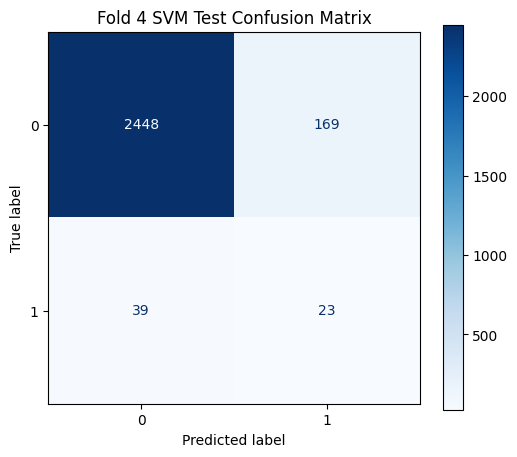


--- Training XGBoost for Fold 4 ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [00:38:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Training Metrics:
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1-score: 1.00
    AUC ROC: 1.00


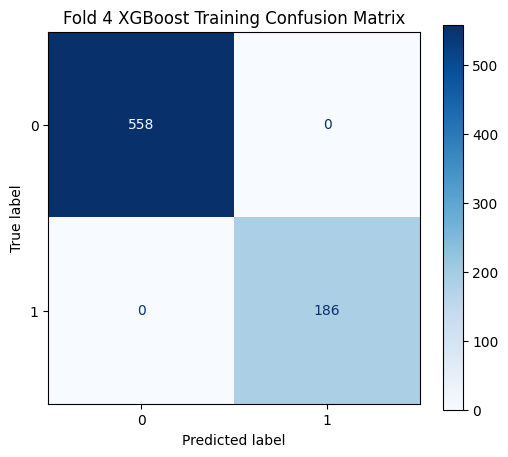

  Test Metrics:
    Accuracy: 0.88
    Precision: 0.09
    Recall: 0.45
    F1-score: 0.15
    AUC ROC: 0.83


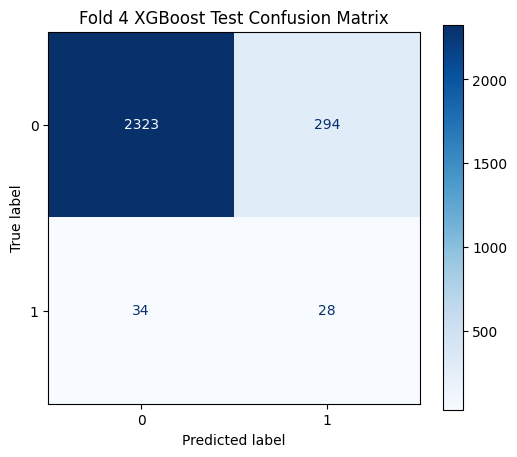


Classification analysis complete for all folds and classifiers.
Displaying the first 5 rows of the results_df:
       Classifier Name Training/test set Balanced/unbalanced train set  \
0                  LDA               NaN                           NaN   
1                  LDA               NaN                           NaN   
2  Logistic Regression               NaN                           NaN   
3  Logistic Regression               NaN                           NaN   
4        Decision Tree               NaN                           NaN   

  Number of training samples  \
0                        744   
1                       2679   
2                        744   
3                       2679   
4                        744   

  Number of non-healthy companies in training sample   TP    TN   FP   FN  \
0                                                186   64   521   37  122   
1                                                 62   22  2472  145   40   
2                  

In [ ]:
columns = ['Classifier Name', 'Training/test set', 'Balanced/unbalanced train set',
           'Number of training samples', 'Number of non-healthy companies in training sample',
           'TP', 'TN', 'FP', 'FN', 'ROC-AUC']
results_df = pd.DataFrame(columns=columns)

#random state=42 to ensure that the results can be replicated exctly
#Models
classifiers = [
    ('LDA', LinearDiscriminantAnalysis()),
    ('Logistic Regression', LogisticRegression(random_state=42, solver='liblinear')),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('K-NN', KNeighborsClassifier()),
    ('Naïve Bayes', GaussianNB()),
    ('SVM', SVC(probability=True, random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')) # Added random_state and eval_metric for consistency
]

#Stratified to ensure that each fold has the same % of healthy and bankrupt companies as the og dataset
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)


fold_count = 0
for train_index, test_index in skf.split(X, y):
    fold_count += 1
    print(f"\n{'='*50}")
    print(f"Processing Fold {fold_count}/{skf.get_n_splits()}...")

    # Extract training and testing sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print("Train distribution (Original):")
    print(y_train.value_counts())
    print("Test distribution (Original):")
    print(y_test.value_counts())

    healthy_count_train = y_train.value_counts().get(0, 0)
    bankrupt_count_train = y_train.value_counts().get(1, 0)

    is_balanced = False
    if bankrupt_count_train > 0 and (healthy_count_train / bankrupt_count_train) > 3:
        #How many healthy companies need to be removed
        target_healthy_count = bankrupt_count_train * 3
        num_to_remove = healthy_count_train - target_healthy_count

        healthy_indices = y_train[y_train == 0].index
        #Ensure num_to_remove is an integer and not negative
        num_to_remove = max(0, int(num_to_remove))
        if num_to_remove > 0:
            np.random.seed(42)

            remove_indices = np.random.choice(healthy_indices, size=num_to_remove, replace=False)
            # Create new balanced training sets
            X_train_balanced = X_train.drop(index=remove_indices)
            y_train_balanced = y_train.drop(index=remove_indices)
            is_balanced = True
            balance_status = 'Balanced'
            print(f"  Train set for Fold {fold_count} was unbalanced (Healthy:{healthy_count_train}, Bankrupt:{bankrupt_count_train}).")
            print(f"  Downsampling healthy companies to achieve a 3:1 ratio. New healthy count: {target_healthy_count}")
            print(f"  Balanced X_train shape: {X_train_balanced.shape}, y_train shape: {y_train_balanced.shape}")
        else:
            X_train_balanced = X_train
            y_train_balanced = y_train
            balance_status = 'Unbalanced (ratio <= 3:1)'
            print(f"  Train set for Fold {fold_count} is already balanced (Healthy:{healthy_count_train}, Bankrupt:{bankrupt_count_train}) or close to 3:1 ratio. No downsampling performed.")
    else:
        X_train_balanced = X_train
        y_train_balanced = y_train
        balance_status = 'Unbalanced (ratio <= 3:1)' if bankrupt_count_train > 0 else 'Unbalanced (no bankrupt)'
        print(f"  Train set for Fold {fold_count} is balanced (Healthy:{healthy_count_train}, Bankrupt:{bankrupt_count_train}) or has no bankrupt companies. No downsampling performed.")

    print(f"\n--- Fold {fold_count} FINAL Distributions (Requirement 7) ---")
    print("Balanced Training set distribution:")
    print(y_train_balanced.value_counts())
    print("Test set distribution (Original):")
    print(y_test.value_counts())

    num_train_samples = len(y_train_balanced)
    num_non_healthy_train = y_train_balanced.value_counts().get(1, 0)

    #Loop
    for clf_name, clf in classifiers:
        print(f"\n--- Training {clf_name} for Fold {fold_count} ---")

        clf.fit(X_train_balanced, y_train_balanced)

        #Helper function to evaluate and store metrics
        def evaluate_and_store(X_data, y_true, data_type, current_results_df):

            y_pred = clf.predict(X_data)

            y_proba = None
            if hasattr(clf, "predict_proba"):
                #Check if there are at least two classes in y_true
                if len(np.unique(y_true)) > 1:
                    y_proba = clf.predict_proba(X_data)[:, 1]
                else:
                    #If only one class is present, ROC AUC cannot be calculated (will be NaN)
                    y_proba = None
            elif hasattr(clf, "decision_function"):
                pass

            #Calc confusion matrix
            #Labels are always [0, 1] for binary classification.
            cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
            tn, fp, fn, tp = cm.ravel()

            accuracy = accuracy_score(y_true, y_pred)
            precision = precision_score(y_true, y_pred, zero_division=0)
            recall = recall_score(y_true, y_pred, zero_division=0)
            f1 = f1_score(y_true, y_pred, zero_division=0)
            roc_auc = roc_auc_score(y_true, y_proba) if y_proba is not None and len(np.unique(y_true)) > 1 else np.nan

            print(f"  {data_type} Metrics:")
            print(f"    Accuracy: {accuracy:.2f}")
            print(f"    Precision: {precision:.2f}")
            print(f"    Recall: {recall:.2f}")
            print(f"    F1-score: {f1:.2f}")
            print(f"    AUC ROC: {roc_auc:.2f}")

            #Display
            fig, ax = plt.subplots(figsize=(6, 5))
            ConfusionMatrixDisplay.from_estimator(clf, X_data, y_true, cmap=plt.cm.Blues, ax=ax)
            ax.set_title(f"Fold {fold_count} {clf_name} {data_type} Confusion Matrix")
            plt.show()

            #Store
            new_row = pd.DataFrame([{
                'Classifier Name': clf_name,
                'Training or test set': data_type,
                'Balanced or unbalanced train set': balance_status,
                'Number of training samples': num_train_samples if data_type == 'Training' else len(y_true),
                'Number of non-healthy companies in training sample': num_non_healthy_train if data_type == 'Training' else y_true.value_counts().get(1, 0),
                'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn,
                'ROC-AUC': roc_auc
            }])
            current_results_df = pd.concat([current_results_df, new_row], ignore_index=True)

            return current_results_df

        # Evaluate on training set
        results_df = evaluate_and_store(X_train_balanced, y_train_balanced, 'Training', results_df)

        # Evaluate on test set
        results_df = evaluate_and_store(X_test, y_test, 'Test', results_df)

print("\nClassification analysis complete for all folds and classifiers.")
print("Displaying the first 5 rows of the results_df:")
print(results_df.head())


In [ ]:
#csv
output_filename = 'balancedDataOutcomes.csv'
results_df.to_csv(output_filename, index=False)

print(f"Evaluation results saved to {output_filename}")
print("Displaying the first 5 rows of the saved results:")
print(pd.read_csv(output_filename).head())

Evaluation results saved to balancedDataOutcomes.csv
Displaying the first 5 rows of the saved results:
       Classifier Name  Training/test set  Balanced/unbalanced train set  \
0                  LDA                NaN                            NaN   
1                  LDA                NaN                            NaN   
2  Logistic Regression                NaN                            NaN   
3  Logistic Regression                NaN                            NaN   
4        Decision Tree                NaN                            NaN   

   Number of training samples  \
0                         744   
1                        2679   
2                         744   
3                        2679   
4                         744   

   Number of non-healthy companies in training sample   TP    TN   FP   FN  \
0                                                186    64   521   37  122   
1                                                 62    22  2472  145   40   
2      